# **Trent Rivers Final Project**

## **Greetings!**

In this project, I am going to be attempting to implement reinforcement learning on OpenAI's Bipedal Walker environment. This environment was selected because I am particularly interested in Machine Learning enabled locomotion. This environment allows me to experiment with that without dealing with the dependencies and installations required for more complex MuJoCo environments provided in Gymnasium. This environment also provides the agent with a greater range of options since we are not using discrete action values. I'm interested to see the results.

In [8]:
#Handling proper libraries.
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install matplotlib

In [9]:
import gymnasium as gym
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

## **The Environment**

The Bipedal Walker environment uses a 4-jointed walker to traverse a 2D environment - it's like a box with two simple legs. The actions available are motor speed values in the range [-1, 1] for each of the 4 joints.

The bipedal walker agent accumulates rewards by moving forward (to the right), up to 300+ at the far end. If it falls, it immediately receives -100 points and the episode is terminated. According to the documentation, this problem is "solved" when the agent can clear 300 points in 1600 time steps on normal mode (slightly bumpy terrain) or 2000 time steps in hardcore mode (with obstacles the agents will need to overcome). 



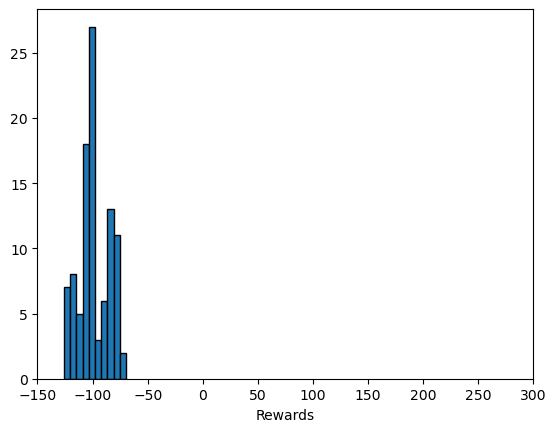

<Figure size 640x480 with 0 Axes>

In [14]:
import datetime

env = gym.make("BipedalWalker-v3", render_mode = "rgb_array")

def one_episode():
    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while total_steps < 1600:
        action = env.action_space.sample() #.sample method gives a random action sample
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break
            
    return total_reward

rewards = [one_episode() for i in range(500)]
plt.hist(rewards, edgecolor='black')
plt.xlim(-150, 300)
plt.xlabel("Rewards")
plt.ylabel("Count")
plt.title("Random Agent Performance")
plt.show()
now = datetime.datetime.now()
current_time = now.strftime("%H-%M-%S")
plt.savefig("figure"+str(current_time) + ".png")

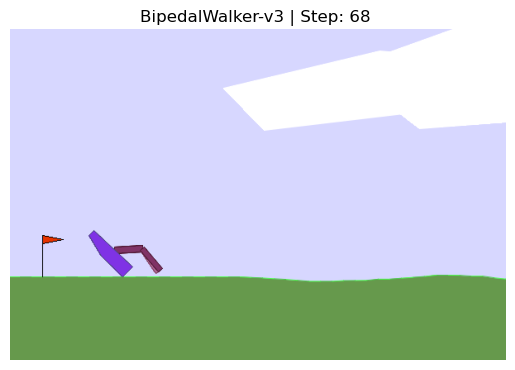

Episode done in 68 steps, total reward -117.64


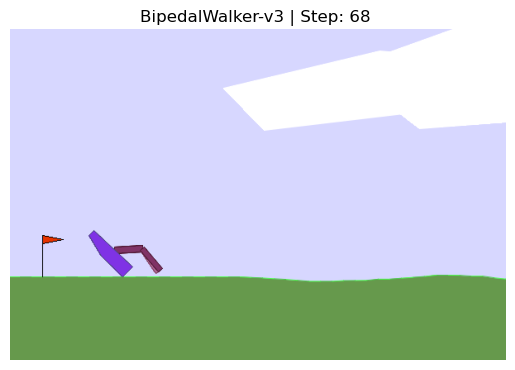

In [6]:



"""
total_reward = 0.0
total_steps = 0
obs = env.reset()

while True:
    action = env.action_space.sample() #.sample method gives a random action sample
    print(action)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
"""

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

#env = gym.make("CartPole-v1", render_mode='rgb_array')
#env = gym.wrappers.Monitor(env, "recording", force=True)

total_reward = 0.0
total_steps = 0
obs = env.reset()

while True:
    action = env.action_space.sample()
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    show_state(env,total_steps)
    if done:
        break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
env.close()
env.env.close()   